In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:

df = pd.read_csv("dataset/measurements.csv")

In [3]:
df.head()

,distance,consume,speed,temp_inside,temp_outside,specials,gas_type,AC,rain,sun,refill liters,refill gas
0,28,5,26,"21,5",12,NaN,E10,0,0,0,45,E10
1,12,"4,2",30,"21,5",13,NaN,E10,0,0,0,NaN,NaN
2,"11,2","5,5",38,"21,5",15,NaN,E10,0,0,0,NaN,NaN
3,"12,9","3,9",36,"21,5",14,NaN,E10,0,0,0,NaN,NaN
4,"18,5","4,5",46,"21,5",15,NaN,E10,0,0,0,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 388 entries, 0 to 387
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   distance       388 non-null    object
 1   consume        388 non-null    object
 2   speed          388 non-null    int64 
 3   temp_inside    376 non-null    object
 4   temp_outside   388 non-null    int64 
 5   specials       93 non-null     object
 6   gas_type       388 non-null    object
 7   AC             388 non-null    int64 
 8   rain           388 non-null    int64 
 9   sun            388 non-null    int64 
 10  refill liters  13 non-null     object
 11  refill gas     13 non-null     object
dtypes: int64(5), object(7)
memory usage: 36.5+ KB


In [5]:
df.isnull().sum()

distance           0
consume            0
speed              0
temp_inside       12
temp_outside       0
specials         295
gas_type           0
AC                 0
rain               0
sun                0
refill liters    375
refill gas       375
dtype: int64

In [6]:
df = df.drop(['specials', 'refill liters', 'refill gas'], axis=1) #elimino las columnas con demasiados valores nulos

In [7]:
df.dtypes #cambio tipo de dato de las columnas

distance        object
consume         object
speed            int64
temp_inside     object
temp_outside     int64
gas_type        object
AC               int64
rain             int64
sun              int64
dtype: object

In [8]:
df["distance"] =  df["distance"].str.replace(",",".").astype(float)

In [9]:
df["distance"].dtype

dtype('float64')

In [10]:
df["consume"] = df["consume"].str.replace(",",".").astype(float)

In [11]:
df["consume"].dtype

dtype('float64')

In [12]:
df["temp_inside"] = df["temp_inside"].str.replace(",",".").astype(float)

In [13]:
df["temp_inside"].dtype

dtype('float64')

In [14]:
df.dtypes

distance        float64
consume         float64
speed             int64
temp_inside     float64
temp_outside      int64
gas_type         object
AC                int64
rain              int64
sun               int64
dtype: object

In [15]:
#rellenare los valores nulos con la media
df["temp_inside"].mean()

21.929521276595743

In [16]:
df["temp_inside"] = df["temp_inside"].fillna(df["temp_inside"].mean())

In [17]:
df["temp_inside"].isnull().sum()

0

In [18]:
df.isnull().sum() #compruebo que ya no hay valores nulos

distance        0
consume         0
speed           0
temp_inside     0
temp_outside    0
gas_type        0
AC              0
rain            0
sun             0
dtype: int64

In [19]:
df.gas_type.value_counts()

SP98    228
E10     160
Name: gas_type, dtype: int64

In [20]:
df.duplicated().sum() #no hay duplicados

0

<AxesSubplot:>

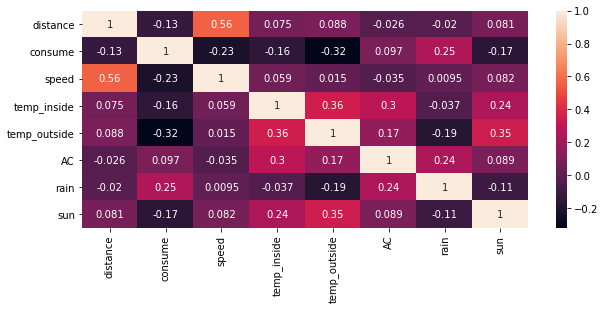

In [21]:
plt.figure(figsize=(10,4))
sns.heatmap(df.corr(),annot=True)
#podemos ver que hay una correlación aunque no muy fuerte entre la velocidad y la distancia,
#y es lógico ya que cuanto más rapido vaya el coche más distancia recorreremos. Con el consumo no hay ninguna que se relacione fuertemente

<AxesSubplot:>

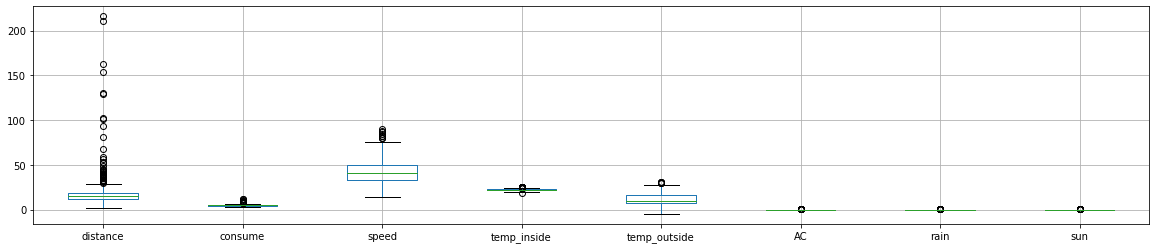

In [22]:
plt.figure(figsize=(20,4))
df.boxplot() #comprobamos que hay muchos outliers en las diferentes variables, sobre todo en distancia

In [23]:
df["distance"].describe() #pero me doy cuenta que el máximo y mínimo son 216 y 1.3, pero son valores que se podrían dar perfectamente
#así que los dejo

count    388.000000
mean      19.652835
std       22.667837
min        1.300000
25%       11.800000
50%       14.600000
75%       19.000000
max      216.100000
Name: distance, dtype: float64

In [24]:
agrupacion_media = df.groupby("gas_type").mean()
agrupacion_media


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
gas_type,,,,,,,,
E10,21.096250,4.931250,43.506250,21.917429,10.11875,0.043750,0.100000,0.075000
SP98,18.639912,4.899123,40.820175,21.938007,12.22807,0.100877,0.140351,0.087719


**mas o menos hay la misma media en todas las variables,
distancia solo hay 3km de diferencia, en velocidad 3 km/ hora de diferencia, que parece tener sentido y que van de la mano
ya que es la misma diferencia de km tanto para la velocidad como para la distancia. Luego la temperatura interior y exterior
practicamente ha sido la misma. La diferencia de consumo entre una y otra es de 0.03 litros**

In [25]:
df.groupby("gas_type").sum()


,distance,consume,speed,temp_inside,temp_outside,AC,rain,sun
gas_type,,,,,,,,
E10,3375.4,789.0,6961,3506.788564,1619,7,16,12
SP98,4249.9,1117.0,9307,5001.865691,2788,23,32,20


**aqui hemos agrupado por suma para ver el numero de veces que ha llovido, ha puesto el aire acondicionado, ha hecho sol...
Y deduzco que tampoco es algo tan significativo como para decantarse por un tipo de gas que por otro**

In [26]:
e10_dat = agrupacion_media.iloc[0]
sp98_dat = agrupacion_media.iloc[1]
sp98_dat

distance        18.639912
consume          4.899123
speed           40.820175
temp_inside     21.938007
temp_outside    12.228070
AC               0.100877
rain             0.140351
sun              0.087719
Name: SP98, dtype: float64

In [27]:
medias_e10 = [i for i in e10_dat]


In [28]:
medias_sp98 = [x for x in sp98_dat]

In [29]:
lista_variables = list(agrupacion_media.keys())

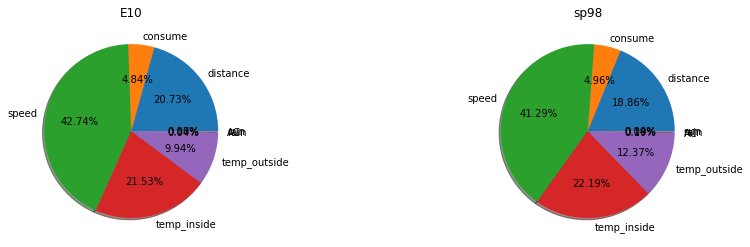

In [30]:
plt.figure(figsize=(15,4))
plt.subplot(1,2,1)
plt.title("E10")
plt.pie(medias_e10, labels=lista_variables,
        autopct='%0.2f%%', shadow=True)
plt.subplot(1,2,2)
plt.title("sp98")
plt.pie(medias_sp98, labels=lista_variables,
        autopct='%0.2f%%', shadow=True)
plt.show()



**en estas gráficas se ve claramente que la proporcion de las variables es practicamente la misma, y nos interesaba saber si habia mucha diferencia entre
unas y otras sobre todo en la distancia o velocidad para ver que tipo de gas nos puede interesar más pero vemos que solo hay una diferencia de 3k en cada una, que no es un dato realmente relevante**

In [31]:
agrupacion_media["consume"] #vemos que hay una mínima diferencia de consumo, solo de 0.03 litros.
#podemos ver que la mejor idea teniendo en cuenta los datos obtenidos anteriormente, es ver la diferencia con el precio.

gas_type
E10     4.931250
SP98    4.899123
Name: consume, dtype: float64

In [32]:
print(f"E10 ha generado más consumo pero su precio por litro es 1.38, es decir, {round((4.93*1.38),2)} € ha gastado de media en total por cada trayecto realizando más distancia que con SP98")

E10 ha generado más consumo pero su precio por litro es 1.38, es decir, 6.8 € ha gastado de media en total por cada trayecto realizando más distancia que con SP98


In [33]:
print(f"SP98 ha generado menos consumo aunque su precio por litro es más caro (es 1.46€) , es decir, {round((4.90*1.46),2)} € ha gastado de media en  total por cada trayecto realizando menos distancia que con E10")

SP98 ha generado menos consumo aunque su precio por litro es más caro (es 1.46€) , es decir, 7.15 € ha gastado de media en  total por cada trayecto realizando menos distancia que con E10


**por estas conclusiones creo que el E10, a pensar que por los datos consume solo un poco más que SP98, acaba siendo más económico 
recorriendo a su vez un poco más de distancia que con SP98.
AUNQUE HICIERAMOS UNA REGLA DE TRES PARA IGUALAR EL MISMO CONSUMO DE LOS DOS SEGUIRÍA SIENDO MÁS BARATO EL E10**

In [49]:


df["gas_type"] = df["gas_type"].apply(lambda x: 0 if x == "E10" else 1 )

In [35]:
vc = df["gas_type"].value_counts()
vc

1    228
0    160
Name: gas_type, dtype: int64

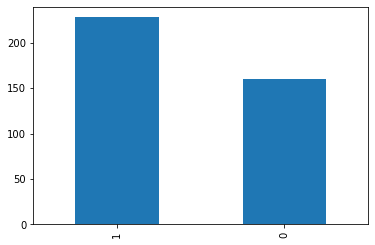

In [36]:
df["gas_type"].value_counts().plot.bar(); #no hay mucho desbalanceo de datos con los tipos de gas 

In [37]:
# lo que si que debo hacer es normalizar los datos para posteriores predicciones del consumo pero lo haré en otro cuaderno

In [38]:
#exporto csv para entrenar modelo
df.to_csv("dataset/csv_limpio.csv",index=False)


In [39]:
#enriquezco mi csv añadiendo el precio por litro de cada tipo de gas

In [59]:
df["price"] = 4



In [60]:
df["price"] = df["price"].where(df["gas_type"]== 0, 1.46)

In [61]:
df["price"] = df["price"].where(df["gas_type"]== 1, 1.38)

In [62]:
df["price"].value_counts()

1.46    228
1.38    160
Name: price, dtype: int64

In [63]:
df

,distance,consume,speed,temp_inside,temp_outside,gas_type,AC,rain,sun,price
0,28.0,5.0,26,21.5,12,0,0,0,0,1.38
1,12.0,4.2,30,21.5,13,0,0,0,0,1.38
2,11.2,5.5,38,21.5,15,0,0,0,0,1.38
3,12.9,3.9,36,21.5,14,0,0,0,0,1.38
4,18.5,4.5,46,21.5,15,0,0,0,0,1.38
...,...,...,...,...,...,...,...,...,...,...
383,16.0,3.7,39,24.5,18,1,0,0,0,1.46
384,16.1,4.3,38,25.0,31,1,1,0,0,1.46
385,16.0,3.8,45,25.0,19,1,0,0,0,1.46
386,15.4,4.6,42,25.0,31,1,1,0,0,1.46


In [64]:
df["gas_type"] = df["gas_type"].apply(lambda x: "E10" if x == 0 else "SP98" )

In [65]:
#vuelvo a exportar csv para introducirlo a una base de datos mongo, el anterior solo para entrenar.
df.to_csv("dataset/cvs_enriquecido.csv",index=False)